In [39]:
from pathlib import Path
import json
import pandas as pd

path = Path('../reports')

# get folders from path
folders = [x for x in path.iterdir() if x.is_dir()]

# in the folders are multiple json files. 
# Create a dataframe that contains in every row the data from the json files named "synthetic.json".

df = pd.DataFrame()
for folder in folders:
    files = [x for x in folder.iterdir() if x.is_file()]
    for file in files:
        with open(file) as json_file:
            data = json.load(json_file)
            data = {k: v for k, v in data.items() if k in ['metrics', 'data stats']}
            data = pd.json_normalize(data, meta=['metrics', 'data stats'])
            model = folder.name.split("_")[0]
            data['type'] = file.name.split(".")[0]
            data["model"] = model
            df = df.append(data, ignore_index=True)

df


,metrics.avg min matching distance,metrics.True positive rate,metrics.False positive rate,metrics.avg F1 score,data stats.graph stats.avg number of nodes,data stats.graph stats.avg centrality,data stats.infection stats.avg number of sources,data stats.infection stats.avg portion of infected nodes,data stats.infection stats.std portion of infected nodes,type,model,metrics.avg rank of source,metrics.avg prediction for source,metrics.avg prediction over all nodes,metrics.min prediction over all nodes,metrics.max prediction over all nodes,metrics.avg dist to source,metrics.roc score
0,1.879,0.053,0.047,0.053,1005.99,0.015,15.555,0.326,0.037,synthetic,unsup-medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45.555,0.390,0.341,0.033,399.00,0.075,5.920,0.274,0.038,airports,GCNR-small,184.368,0.721,0.783,0.187,3.311,2.311,0.526
2,20.880,0.272,0.215,0.037,4039.00,0.011,64.300,0.260,0.031,facebook,GCNR-small,1732.183,0.860,1.054,-0.128,13.460,3.687,0.560
3,8.998,0.155,0.074,0.053,2357.00,0.004,37.320,0.222,0.033,wiki,GCNR-small,897.583,0.942,1.142,0.026,7.808,3.646,0.639
4,16.543,0.617,0.173,0.099,1005.99,0.015,15.555,0.218,0.033,synthetic,GCNR-small,169.583,0.549,1.436,0.090,3.032,3.545,0.849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,22.453,0.362,0.187,0.056,2357.00,0.004,37.233,0.220,0.032,wiki,GCNR-small,862.982,0.802,1.060,-0.022,8.788,3.656,0.646
57,18.758,0.666,0.195,0.097,1005.99,0.015,15.555,0.218,0.033,synthetic,GCNR-small,171.499,0.540,1.466,0.073,3.073,3.545,0.847
58,4.088,0.015,0.005,0.007,34.00,0.139,1.000,0.099,0.073,karate,GCNR-small,11.422,2.059,2.413,0.125,5.486,2.350,0.585
59,13.990,0.200,0.100,0.054,7600.00,0.001,120.753,0.216,0.030,actor,GCNR-small,3364.905,0.962,1.073,-0.040,19.662,4.113,0.563


In [40]:

#normalize the column metrics.avg min matching distance with the column data stats.graph stats.avg number of nodes
df['metrics.avg min matching distance'] = df['metrics.avg min matching distance']

/tmp/ipykernel_43737/3216556597.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_synthetic['size'] = df_synthetic['model'].apply(lambda x: 'small' if 'small' in x else ('medium' if 'medium' in x else 'large'))
/tmp/ipykernel_43737/3216556597.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_synthetic_size['model'] = pd.Categorical(df_synthetic_size['model'], order)


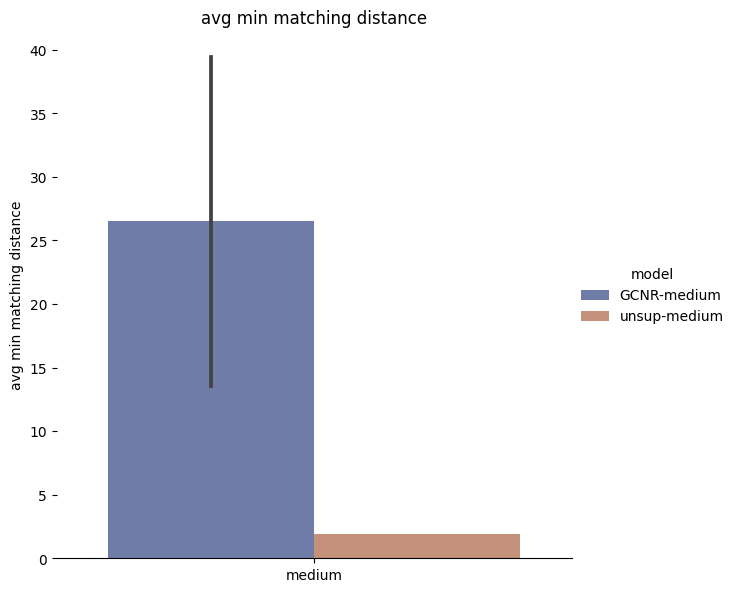

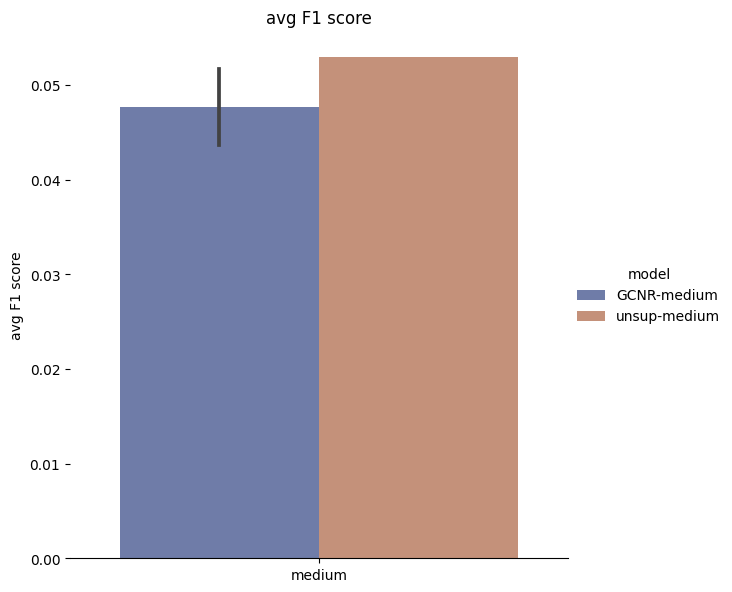

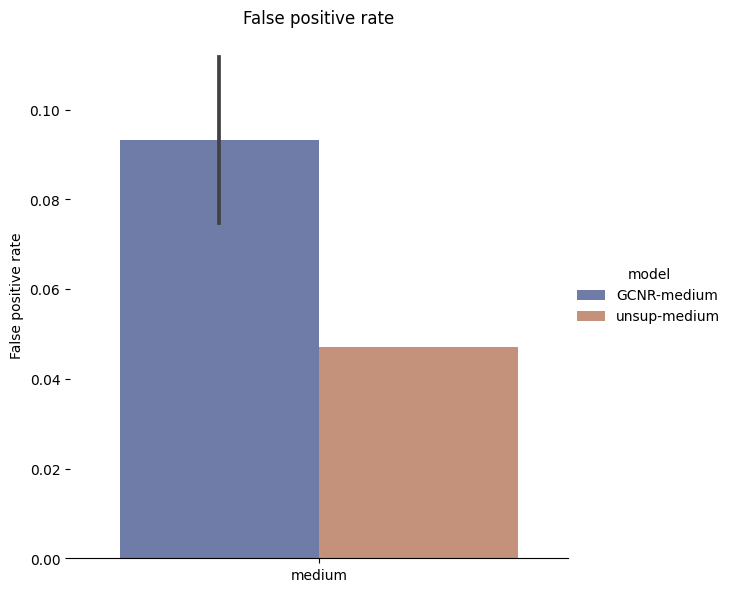

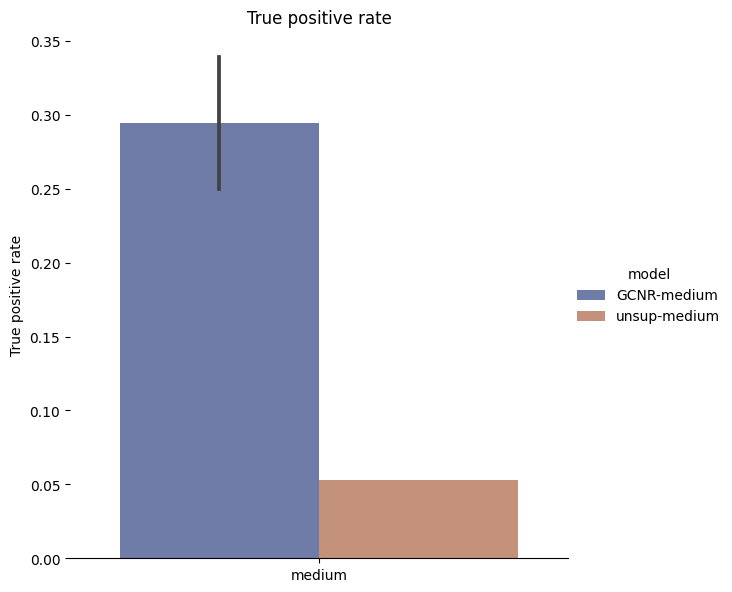

/tmp/ipykernel_43737/3216556597.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_synthetic_size['model'] = pd.Categorical(df_synthetic_size['model'], order)


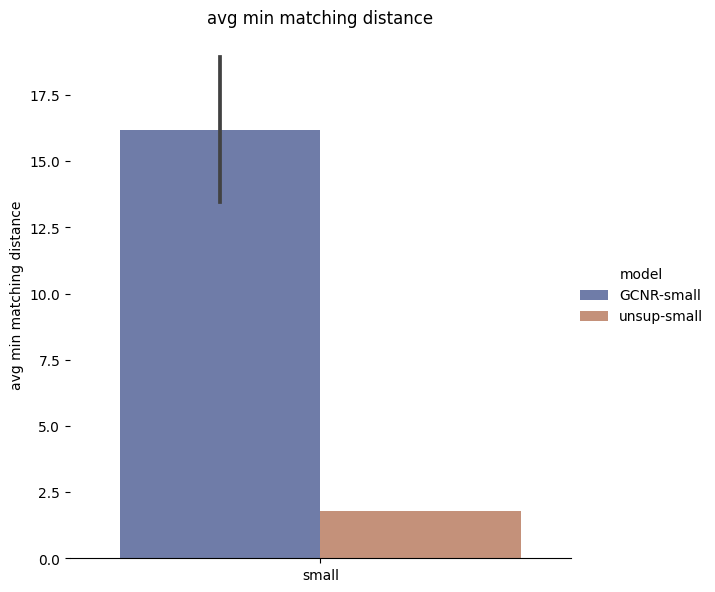

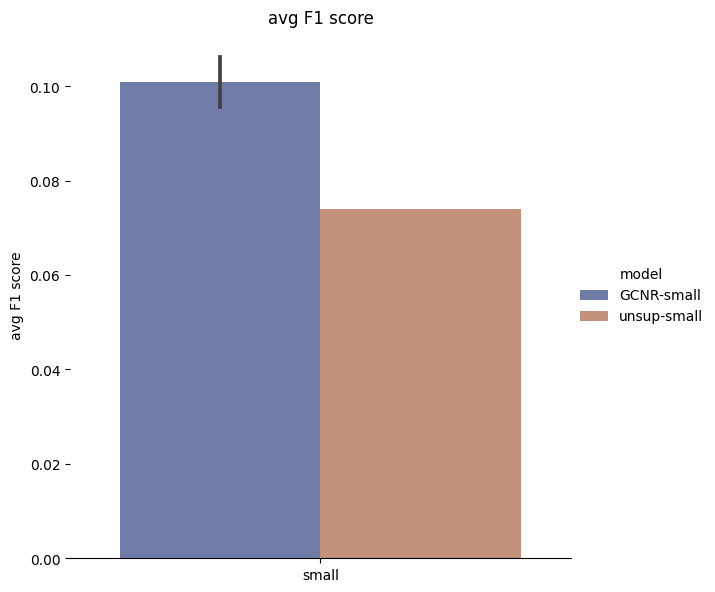

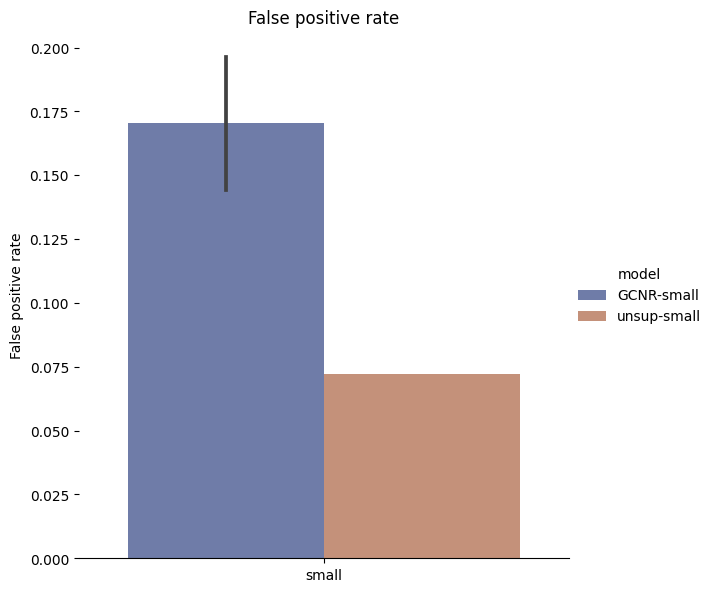

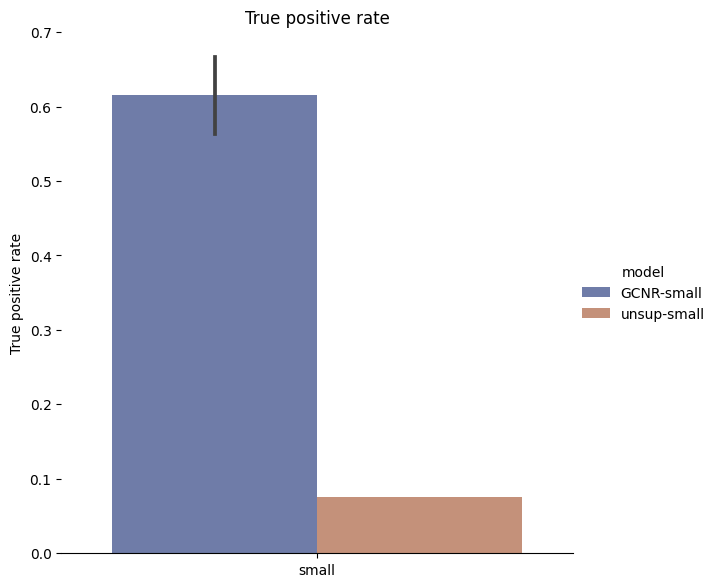

/tmp/ipykernel_43737/3216556597.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_synthetic_size['model'] = pd.Categorical(df_synthetic_size['model'], order)


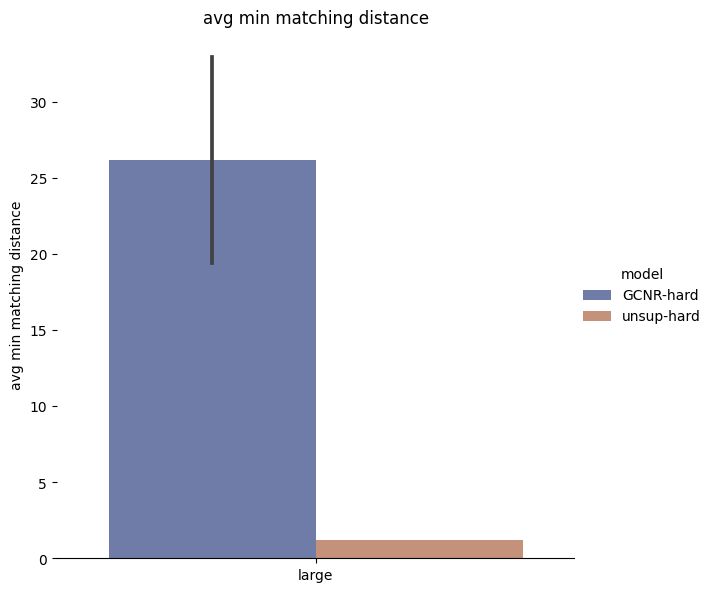

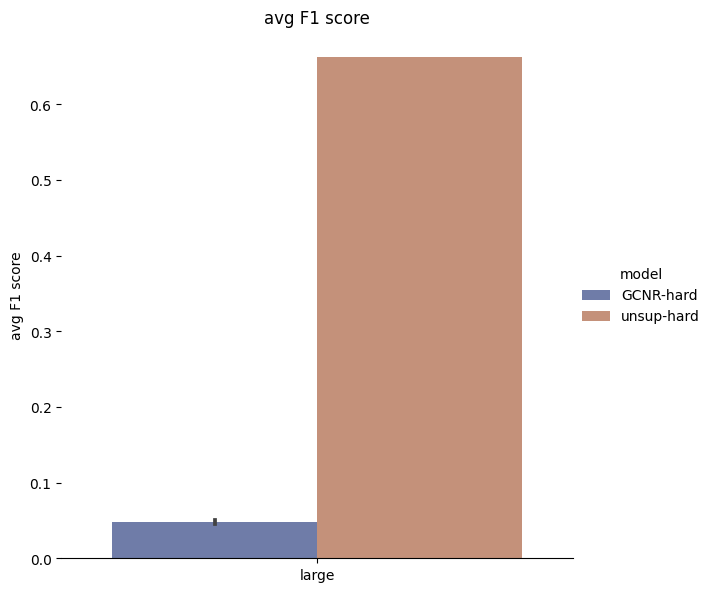

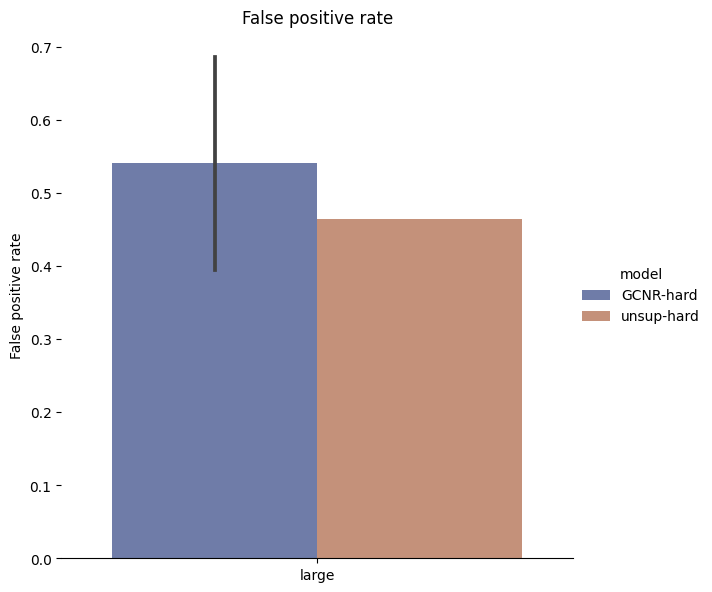

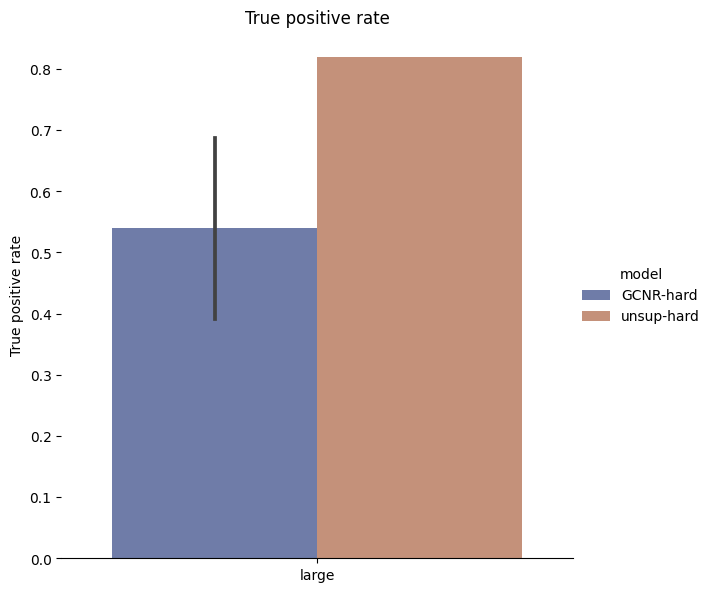

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# get all rows with type = synthetic and remove them from the dataframe
df_synthetic = df[df['type'].isin(['synthetic'])]
df = df[~df['type'].isin(['synthetic'])]

metrics = ["avg min matching distance", "avg F1 score", "False positive rate", "True positive rate"]

# add column containing small, meidum or large depending whether the value for model contains small, medium or large
df_synthetic['size'] = df_synthetic['model'].apply(lambda x: 'small' if 'small' in x else ('medium' if 'medium' in x else 'large'))

# create a plot for every value of size and every metric
for size in df_synthetic['size'].unique():

    df_synthetic_size = df_synthetic[df_synthetic['size'] == size]
    #set order so that the model containing "unsup" is always on the left
    order = df_synthetic_size['model'].unique()
    order = sorted(order, key=lambda x: 'unsup' in x)
    df_synthetic_size['model'] = pd.Categorical(df_synthetic_size['model'], order)
    df_synthetic_size = df_synthetic_size.sort_values('model')


    for metric in metrics:
        g = sns.catplot(
            data=df_synthetic_size, kind="bar",
            x="size", y=f"metrics.{metric}", hue="model",
            errorbar="sd", palette="dark", alpha=.6, height=6,
        )
        

        g.despine(left=True)
        g.set_axis_labels("", metric)
        plt.title(f"{metric}")
        #plt.ylim(0, 0.9)
        plt.show()
    


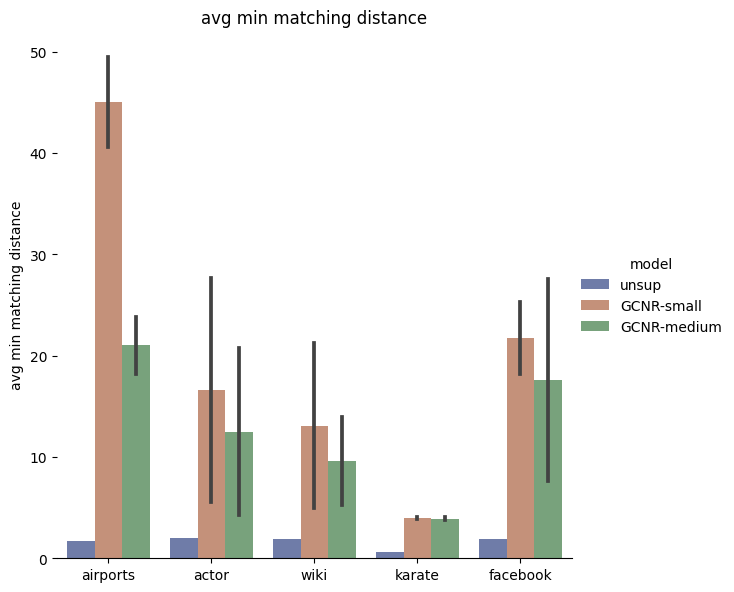

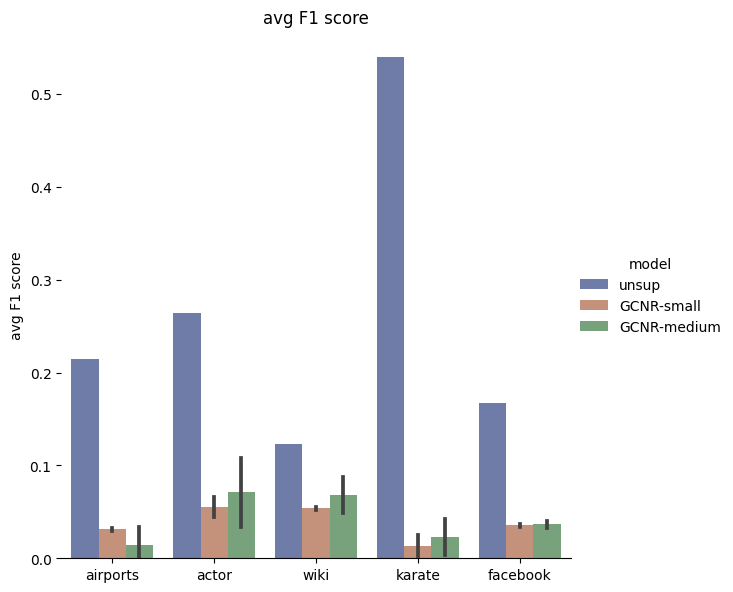

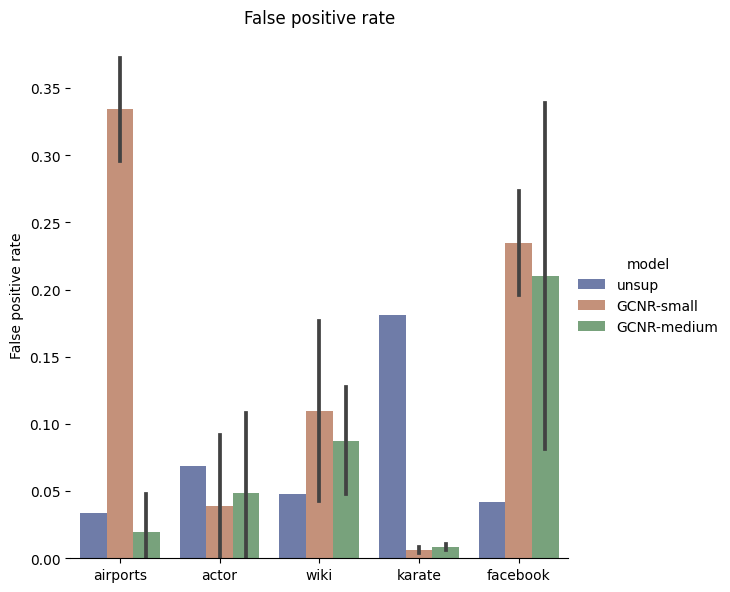

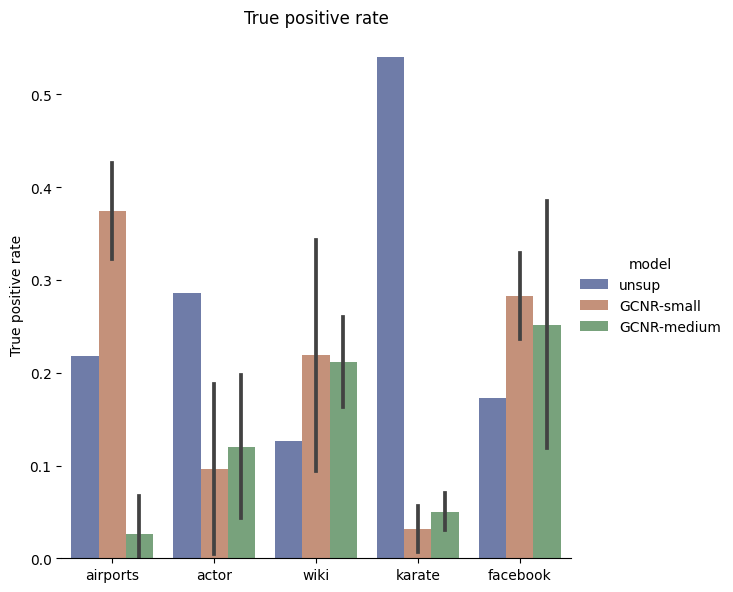

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ["avg min matching distance", "avg F1 score", "False positive rate", "True positive rate"]

df = df[df["model"] != "GCNR-hard"]


for metric in metrics:
    #set order so that the model containing "unsup" is always on the left. than small, medium, large
    order = df['model'].unique()
    order = sorted(order, key=lambda x: 'unsup' in x)
    order = sorted(order, key=lambda x: 'small' in x)
    order = sorted(order, key=lambda x: 'medium' in x)
    order = sorted(order, key=lambda x: 'hard' in x)
    df['model'] = pd.Categorical(df['model'], order)
    df = df.sort_values('model')


    g = sns.catplot(
        data=df, kind="bar",
        x="type", y=f"metrics.{metric}", hue="model",
        errorbar="sd", palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", metric)
    plt.title(f"{metric}")
    plt.ylim(0, None)
    plt.show()


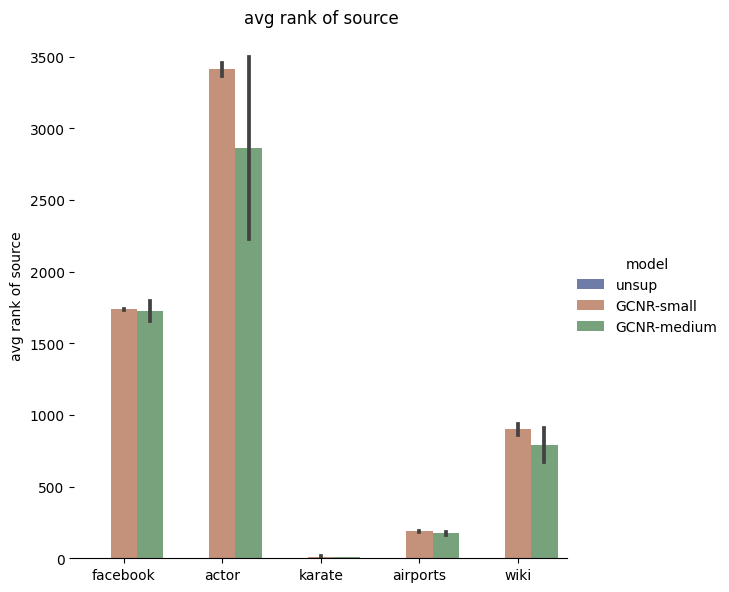

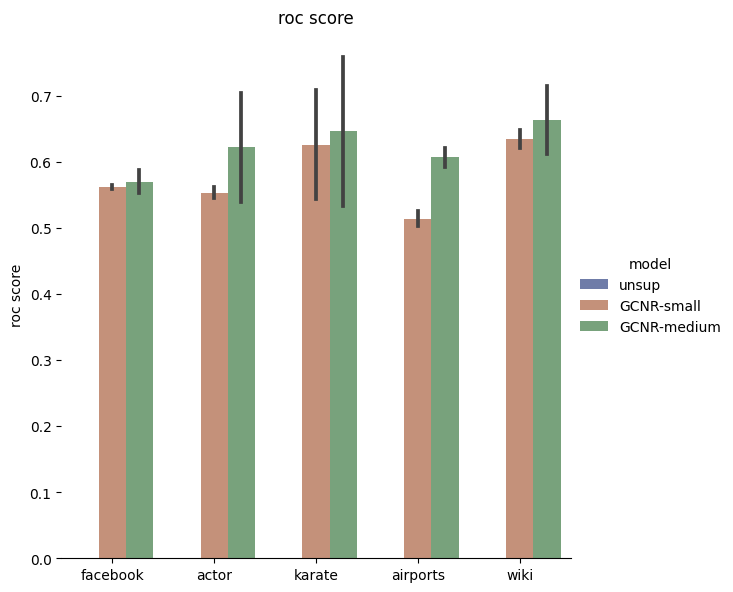

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df[df["model"] != "unsup"]
df = df[df["model"] != "GCNR-hard"]

metrics2 = ["avg rank of source", "roc score"]


for metric in metrics2:
    g = sns.catplot(
        data=df, kind="bar",
        x="type", y=f"metrics.{metric}", hue="model",
        errorbar="sd", palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", metric)
    plt.title(f"{metric}")
    plt.show()